# Medical Insurance Cost Data
> Source: __[Insurance Data](https://www.kaggle.com/mirichoi0218/insurance)__
> , By: __Rupinder Kaur__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
insurance = pd.read_csv("insurance_preprocessed.csv")
insurance.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


## Model Fitting

### Random Forest

In [3]:
## x and y variables
x1 = insurance.drop(["charges"], axis =1)
y1 = insurance["charges"]

In [4]:
## splitting the data into test and training sets
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [5]:
## fitting random forest
from sklearn.ensemble import RandomForestRegressor
Rfr = RandomForestRegressor(n_estimators = 10, min_samples_split = 100 , random_state = 0)
Rfr.fit(x1_train, y1_train)

RandomForestRegressor(min_samples_split=100, n_estimators=10, random_state=0)

In [6]:
## computing R-square
Rfr.score(x1_test, y1_test)
# Accounts for 86% of the variability in the data

0.8600646611697708

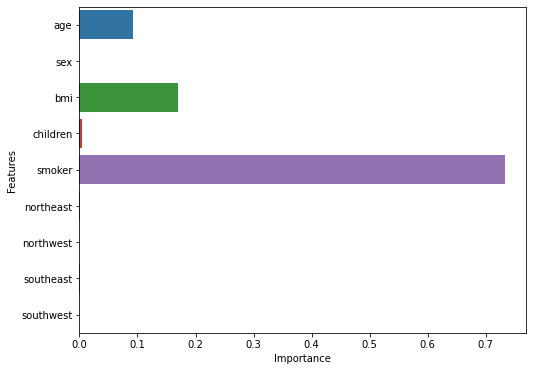

In [7]:
fi = Rfr.feature_importances_

## Plotting feature importances
plt.figure(figsize = (8, 6))
fi_plot = sns.barplot(x = fi, y = insurance.columns.drop(["charges"]))
fi_plot.set_xlabel("Importance")
fi_plot.set_ylabel("Features")
plt.show()
# smoker is most important variable, followed by bmi and age-> as we concluded from EDA  

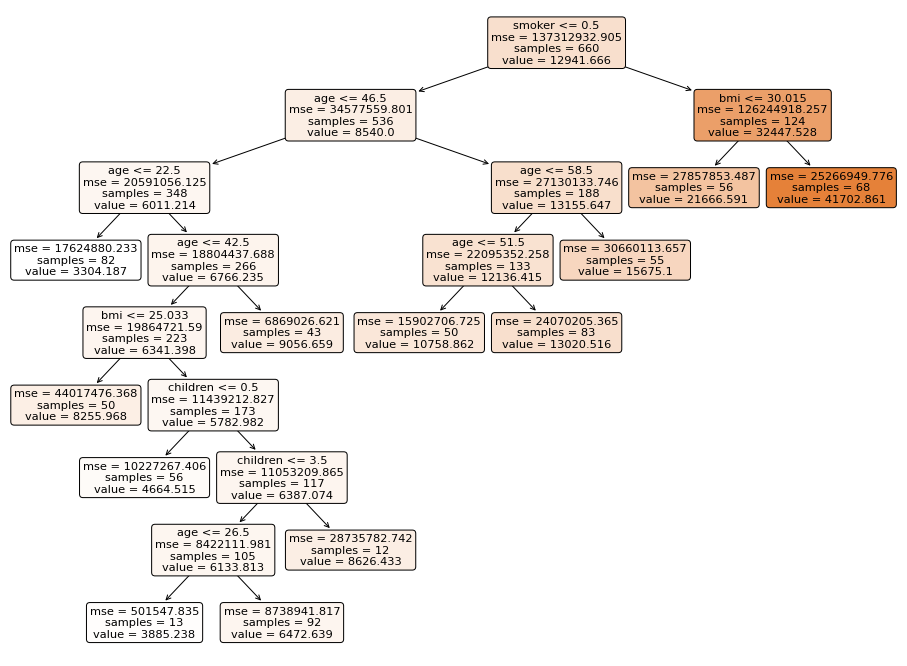

In [8]:
from sklearn import tree
plt.figure(figsize = (16,12))
# Plotting the first decision tree from the random forest 
tree.plot_tree(Rfr.estimators_[0], feature_names = x1.columns, filled = True, rounded = True)
plt.show()

## Conclusion

I analyzed the medical insurance data which included policy holders' sex, age, bmi, number of children they have, region they are from, whether they smoke or not, and what they pay for the insurance. Insurance costs were predicted using random forest. Random forest performed well as it can account for 86% of the variation in the data. It determined "smoker", "bmi" and "age" to be the most important features.